## 6.5: Unsupervised Machine Learning: Clustering

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

## Step 1
### Install and import all necessary libraries in your Jupyter notebook.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

## Step 2
### Import your data and conduct any necessary cleaning, manipulations, and reprocessing (such as renaming). Recall from the Exercise that the k-means algorithm can only handle numerical variables, so you’ll need to remove any categorical columns from your data. Also recall that the difference between your variables’ scales can’t be too large or your results will be biased. Make sure you standardize your data first.

In [3]:
path = 'C:/Users/RUZANNA/OneDrive/Desktop/Careerfoundry/Final Project'

In [4]:
df_orders=pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'orders_6.2.pkl' ))

In [5]:
df_orders.shape

(3304159, 21)

In [6]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3304159 entries, 0 to 3304158
Data columns (total 21 columns):
 #   Column               Dtype         
---  ------               -----         
 0   ORDER_ID             object        
 1   DATETIME             datetime64[ns]
 2   RESTAURANT_ID        object        
 3   TYPE                 object        
 4   DRINKS               float64       
 5   COOKIES              float64       
 6   MAIN                 object        
 7   BASE                 object        
 8   SIDE_1               object        
 9   SIDE_2               object        
 10  MAIN_NAME            object        
 11  BASE_NAME            object        
 12  SIDE_1_NAME          object        
 13  SIDE_2_NAME          object        
 14  RESTAURANT_NAME      object        
 15  MAIN_NAME_CALORIS    float64       
 16  BASE_NAME_CALORIS    float64       
 17  SIDE_1_NAME_CALORIS  float64       
 18  SIDE_2_NAME_CALORIS  float64       
 19  TOTAL_CALORIS        

In [7]:
df_orders.isnull().sum()

ORDER_ID                    0
DATETIME                    0
RESTAURANT_ID               0
TYPE                        0
DRINKS                      0
COOKIES                     0
MAIN                        0
BASE                        0
SIDE_1                      0
SIDE_2                      0
MAIN_NAME              121650
BASE_NAME              121650
SIDE_1_NAME            121650
SIDE_2_NAME            121650
RESTAURANT_NAME             0
MAIN_NAME_CALORIS      121650
BASE_NAME_CALORIS      121650
SIDE_1_NAME_CALORIS    121650
SIDE_2_NAME_CALORIS    121650
TOTAL_CALORIS          121650
CALORIES CATEGORY      121650
dtype: int64

In [8]:
median_value_main = df_orders['MAIN_NAME_CALORIS'].median()

# Fill missing values with the median
df_orders['MAIN_NAME_CALORIS'].fillna(median_value_main, inplace=True)

In [9]:
median_value_base = df_orders['BASE_NAME_CALORIS'].median()

# Fill missing values with the median
df_orders['BASE_NAME_CALORIS'].fillna(median_value_base, inplace=True)

In [10]:
median_value_side1 = df_orders['SIDE_1_NAME_CALORIS'].median()

# Fill missing values with the median
df_orders['SIDE_1_NAME_CALORIS'].fillna(median_value_side1, inplace=True)

In [11]:
median_value_side2 = df_orders['SIDE_2_NAME_CALORIS'].median()

# Fill missing values with the median
df_orders['SIDE_2_NAME_CALORIS'].fillna(median_value_side2, inplace=True)

In [12]:
median_value_total = df_orders['TOTAL_CALORIS'].median()

# Fill missing values with the median
df_orders['TOTAL_CALORIS'].fillna(median_value_total, inplace=True)

In [13]:
df_orders.isnull().sum()

ORDER_ID                    0
DATETIME                    0
RESTAURANT_ID               0
TYPE                        0
DRINKS                      0
COOKIES                     0
MAIN                        0
BASE                        0
SIDE_1                      0
SIDE_2                      0
MAIN_NAME              121650
BASE_NAME              121650
SIDE_1_NAME            121650
SIDE_2_NAME            121650
RESTAURANT_NAME             0
MAIN_NAME_CALORIS           0
BASE_NAME_CALORIS           0
SIDE_1_NAME_CALORIS         0
SIDE_2_NAME_CALORIS         0
TOTAL_CALORIS               0
CALORIES CATEGORY      121650
dtype: int64

In [14]:
# Save the modified data for the final project.
df_orders.to_pickle(os.path.join(path, 'Data','Prepared Data', 'orders_6.5.pkl'))

In [15]:
# Create a subset of df_orders containing only numerical data of the same scale.
df_orders_k = df_orders[['MAIN_NAME_CALORIS', 'BASE_NAME_CALORIS', 'SIDE_1_NAME_CALORIS', 'SIDE_2_NAME_CALORIS', 'TOTAL_CALORIS']]

In [16]:
df_orders_k.isnull().sum()

MAIN_NAME_CALORIS      0
BASE_NAME_CALORIS      0
SIDE_1_NAME_CALORIS    0
SIDE_2_NAME_CALORIS    0
TOTAL_CALORIS          0
dtype: int64

## Step 3
### Use the elbow technique as shown in the Jupyter notebook for this Exercise.

### 2. The elbow technique

In [17]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i, n_init=10) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [18]:
score = [kmeans[i].fit(df_orders_k).score(df_orders_k) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-219607243696.1046,
 -72767023448.96535,
 -50715820999.24883,
 -30925978959.73631,
 -23316540465.601784,
 -19270004451.80812,
 -16336613080.22416,
 -14027249276.135193,
 -11972962527.02331]

##  Step 4
### Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart. Explain why you chose that number in a markdown cell.

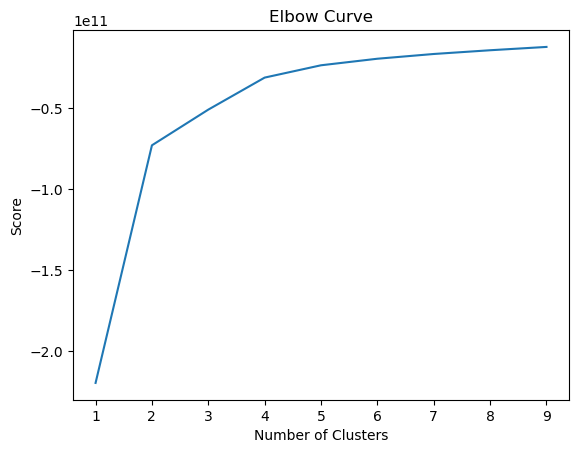

In [19]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for our clusters is three.

## Step 5
### Run the k-means algorithm.

In [20]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_init=10) 


In [21]:
# Fit the k-means object to the data.

kmeans.fit(df_orders_k)

KMeans(n_clusters=3, n_init=10)

## Step 6
### Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.

In [22]:
df_orders_k['clusters'] = kmeans.fit_predict(df_orders_k)

C:\Users\RUZANNA\AppData\Local\Temp\ipykernel_10548\3265124427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders_k['clusters'] = kmeans.fit_predict(df_orders_k)


In [23]:
df_orders_k.head()

,MAIN_NAME_CALORIS,BASE_NAME_CALORIS,SIDE_1_NAME_CALORIS,SIDE_2_NAME_CALORIS,TOTAL_CALORIS,clusters
0,227.0,160.0,140.0,140.0,620.0,0
1,227.0,160.0,140.0,140.0,620.0,0
2,227.0,170.0,177.0,90.0,664.0,0
3,227.0,160.0,140.0,361.0,888.0,1
4,227.0,160.0,170.0,361.0,918.0,1


In [24]:
df_orders_k['clusters'].value_counts()

0    2108296
1     936486
2     259377
Name: clusters, dtype: int64

## Step 7
### Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.

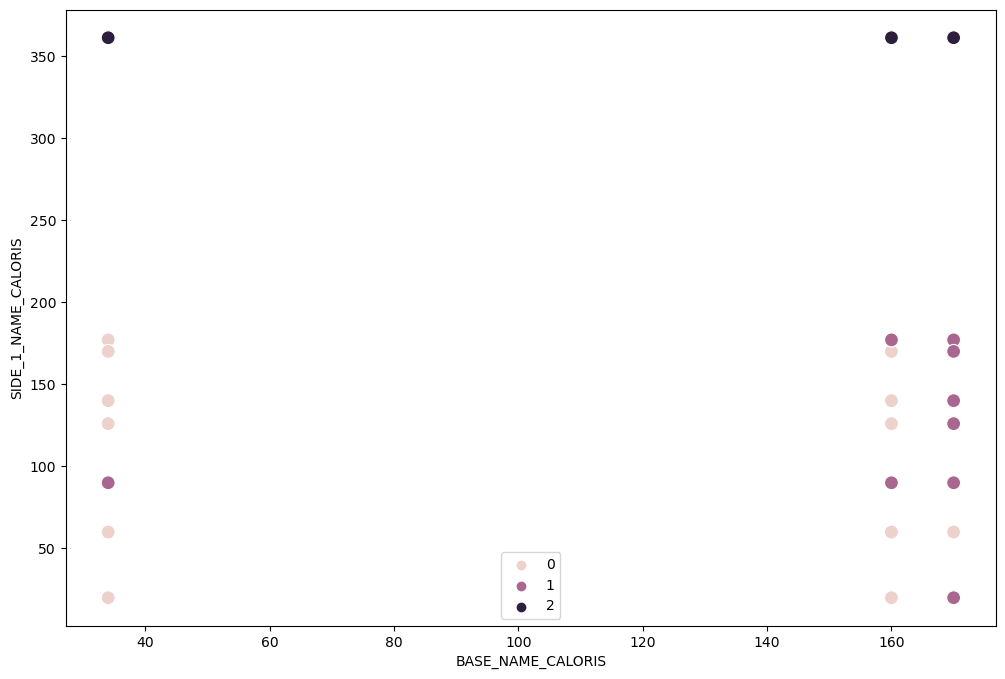

In [25]:
# Plot the clusters for the "BASE_NAME_CALORIS" and "SIDE_1_NAME_CALORIS" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_orders_k['BASE_NAME_CALORIS'], y=df_orders_k['SIDE_1_NAME_CALORIS'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('BASE_NAME_CALORIS') # Label x-axis.
plt.ylabel('SIDE_1_NAME_CALORIS') # Label y-axis.
plt.show()

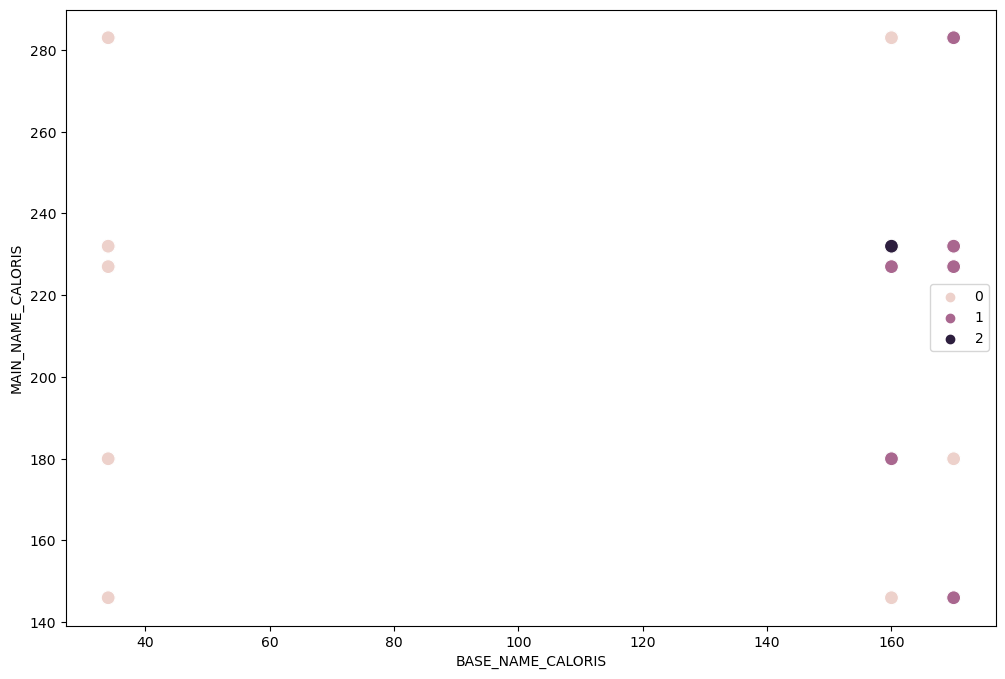

In [26]:
# Plot the clusters for the "BASE_NAME_CALORIS" and "MAIN_NAME_CALORIS" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_orders_k['BASE_NAME_CALORIS'], y=df_orders_k['MAIN_NAME_CALORIS'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('BASE_NAME_CALORIS') # Label x-axis.
plt.ylabel('MAIN_NAME_CALORIS') # Label y-axis.
plt.show()

## Step 8
### Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further. Note down your thoughts in a markdown cell.

### In our case, visualizing clusters doesn't make much sense since there is no correlation between any two variables chosen from the dataset. However, the analysis of descriptive statistics helps us distinguish between three clusters (as detailed below): the three categories of Dig Inn clients. Visualization is not as helpful because the four variables collectively allow us to classify clients. Unfortunately, we cannot create a four-dimensional visualization to visually observe the separate clusters

## Step 9
### Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [27]:
df_orders_k.loc[df_orders_k['clusters'] == 2, 'cluster'] = 'dark purple'
df_orders_k.loc[df_orders_k['clusters'] == 1, 'cluster'] = 'purple'
df_orders_k.loc[df_orders_k['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\RUZANNA\AppData\Local\Temp\ipykernel_10548\1475467584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders_k.loc[df_orders_k['clusters'] == 2, 'cluster'] = 'dark purple'


In [28]:
df_orders_k.groupby('cluster').agg({'MAIN_NAME_CALORIS':['mean', 'median'], 
                         'BASE_NAME_CALORIS':['mean', 'median'], 
                         'SIDE_1_NAME_CALORIS':['mean', 'median'],
                          'SIDE_2_NAME_CALORIS':['mean', 'median'],
                            'TOTAL_CALORIS':['mean', 'median']})

MAIN_NAME_CALORIS        BASE_NAME_CALORIS         \
                         mean median              mean median   
cluster                                                         
dark purple        224.438030  232.0        147.505438  160.0   
pink               218.293704  227.0         79.465195   34.0   
purple             224.456202  232.0        145.236443  160.0   

            SIDE_1_NAME_CALORIS        SIDE_2_NAME_CALORIS         \
                           mean median                mean median   
cluster                                                             
dark purple          361.000000  361.0          361.000000  361.0   
pink                 144.470627  140.0          104.677783  126.0   
purple               134.199029  140.0          342.695005  361.0   

            TOTAL_CALORIS          
                     mean  median  
cluster                            
dark purple   1093.943468  1114.0  
pink           544.195380   557.0  
purple         846.586679   853.0

### The kmeans algoritm looked for pattern and distinguished the Dig Inn customers between three category: low calories consuming group (where the mean and median of total calories equal respectively to 543 and 557), medium calories consuming group (where the mean and median of total calories: 845 and 851) and high calories consuming group where the mean and median of total calories: 1093 and 1114). 

In [29]:
df_orders_k['cluster'].value_counts()

pink           2108296
purple          936486
dark purple     259377
Name: cluster, dtype: int64

In [30]:
df_orders_k['cluster'].value_counts(normalize= 'true')

pink           0.638073
purple         0.283426
dark purple    0.078500
Name: cluster, dtype: float64

## Step 10
### Propose what these results could be useful for in future steps of an analytics pipeline.

###  We observe that 64% of Dig Inn customers lean towards a healthier lifestyle, 28% prefer a moderately healthier lifestyle, and only 7% favor indulging in high-calorie food. One of the objectives of our project was to determine if we could segment our customers for more effective customer management. The answer is affirmative. Using clustering algorithms, we can categorize customers, and Dig Inn management can leverage this information to enhance menu diversity. For instance, incorporating more green dishes could cater to the majority of health-conscious customers. Additionally, this segmentation data can aid in the development of customer management strategies, such as loyalty programs and other promotional mechanisms, to attract and retain customers.

In [31]:
# Save the modified data for the final project.
df_orders.to_csv(os.path.join(path, 'Data','Prepared Data', 'orders_6.5.csv'))

In [32]:
# Save the modified data for the final project.
df_orders_k.to_csv(os.path.join(path, 'Data','Prepared Data', 'orders_k_6.5.csv'))